#gdrive access


/content/gdrive/MyDrive/STUDY/Dacon22

In [2]:
from google.colab import drive,files
drive.mount('/content/gdrive')#드라이브 마운트

Mounted at /content/gdrive


#library loading

In [3]:
import pandas as pd #data 조작용
%matplotlib inline
#Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
import matplotlib.pyplot as plt
# matlab과 비슷하게 명령어 스타일로 동작함
# matplotlib.pyplot 모듈의 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있음
import seaborn as sns
#data 시각화library로 문법적으로 간결함 (base 시각화 기능은 matplotlib)

#ignore warring message
import warnings
warnings.filterwarnings(action='ignore')
#경고창 숨기기

#import data

In [4]:
train=pd.read_csv('/content/gdrive/MyDrive/STUDY/Dacon22/와인품질분류/data/train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/STUDY/Dacon22/와인품질분류/data/test.csv')

#simple EDA((Exploratory Data Analysis))

In [ ]:
train.head()#default value is 5line

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.info() # train data 열 별의 정보 보여줌(전반적인 정보를 나타냄) // 결측치는 없는 경우이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [6]:
train.describe()#data의 column별 요약 통계량을 보여줌 /option을 통해 통곌챵 출력도 가능

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


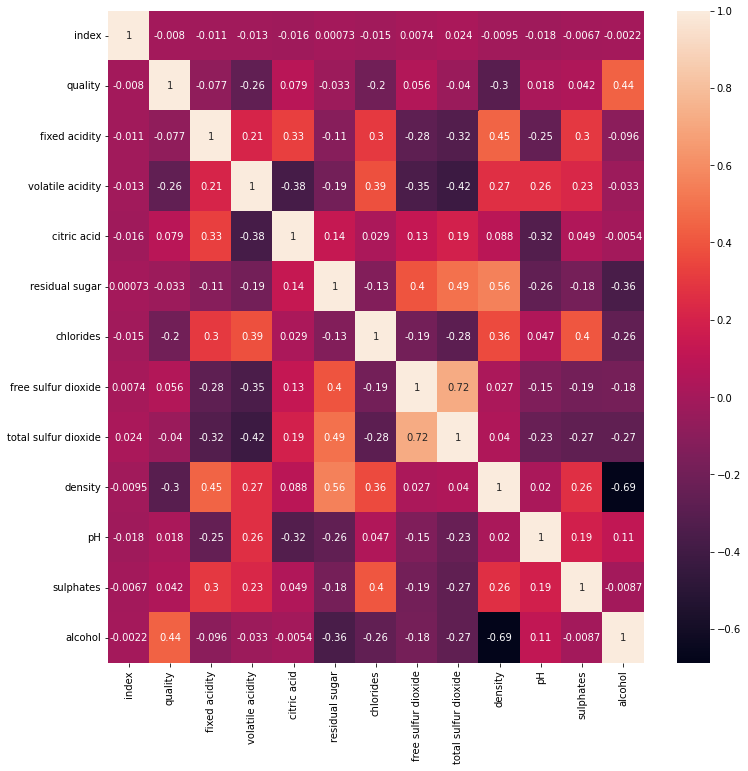

In [8]:
#train의 변수 간 상관관계를 살펴봅니다.
plt.figure(figsize=(12,12))
#figure : matplotlib은 한번에 한장의 그림을 그리는데 이를 의미한다.(~canvas) / value는 inch로 받아낸다

sns.heatmap(data=train.corr(),annot=True)
#일정한 이미지 위헤 열분포 형태로 비쥬얼 한 그래픽을 출력하는 method
  #default는 중복되는 정보들이 표현하게 된다.
  #corr() = Person Correlation Coefficient를 구하는 함수(보통 절댓값이 0.4이상이면 상관관계를 갖는다고 본다.)
  #annot = True 는 입력하면 직접적인 수치를 알 수 있다. / False 는 이미지만 표현

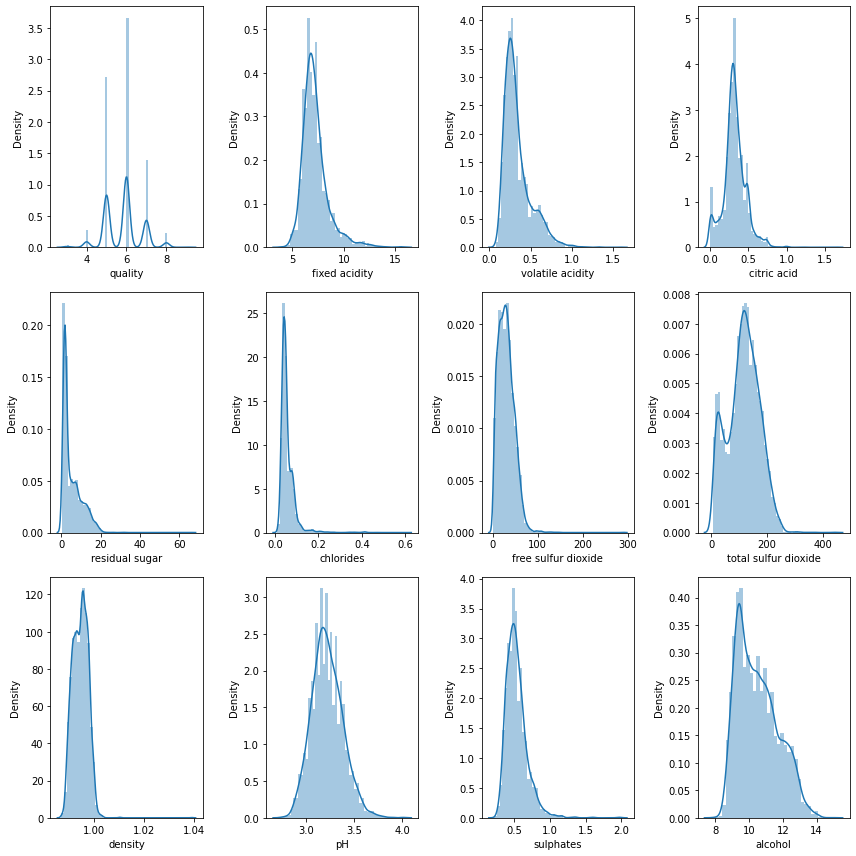

In [11]:
#train의 각 변수별 분포를 살펴봄
plt.figure(figsize=(12,12))

for i in range(1,13):
  plt.subplot(3,4,i)
  #여러 그래프를 그림 #인자값 : 행의 수, 열의 수, 위치
  sns.distplot(train.iloc[:,i])
  #draw displot
plt.tight_layout()
#여백 조정
plt.show()
#show graph

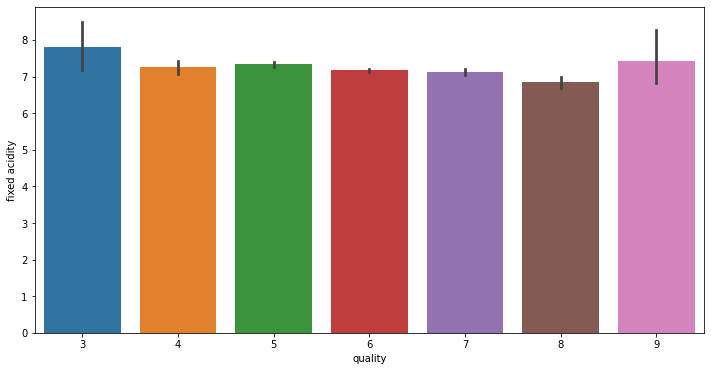

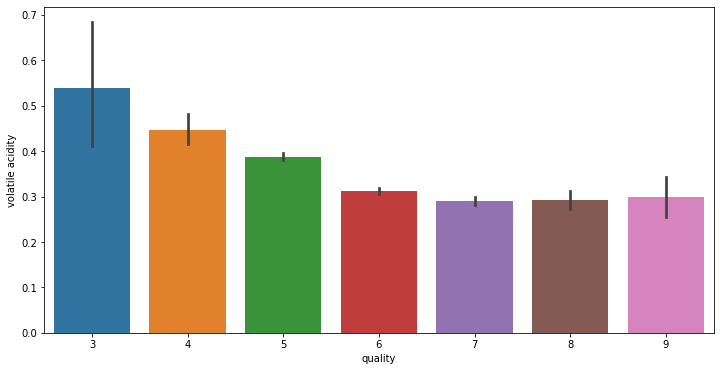

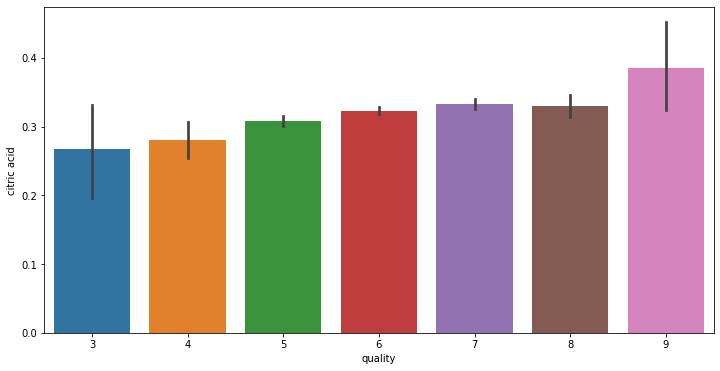

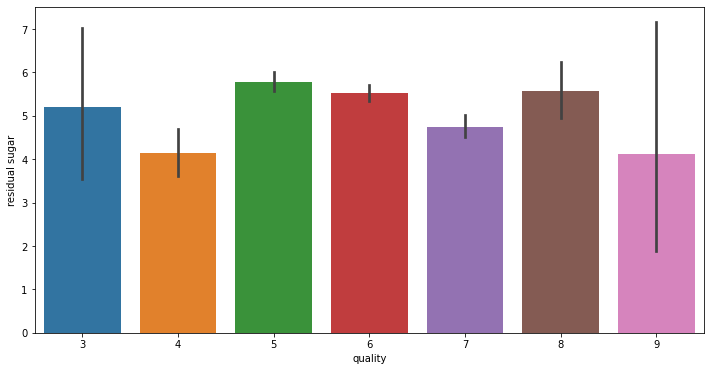

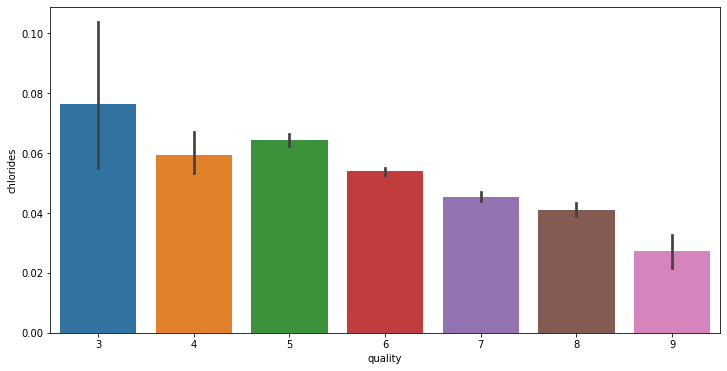

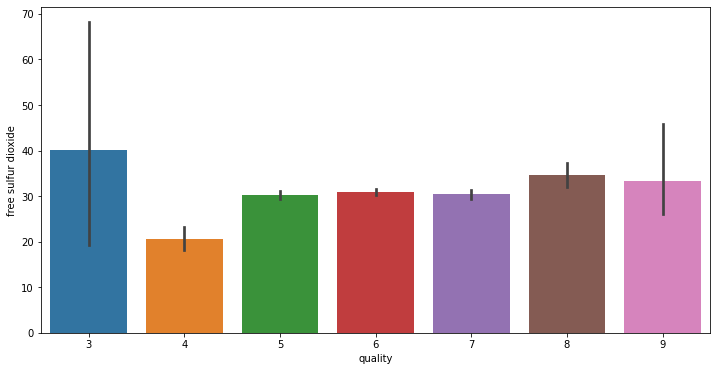

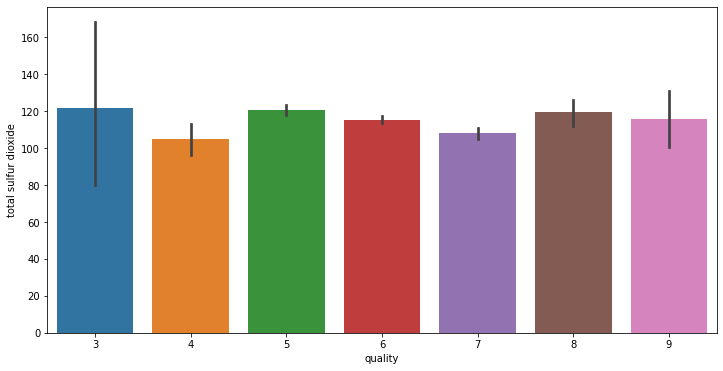

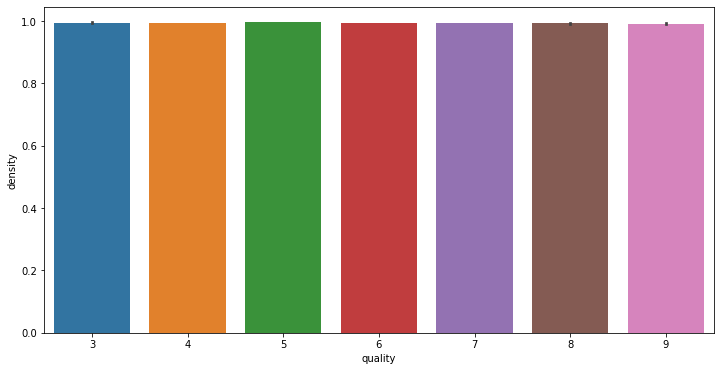

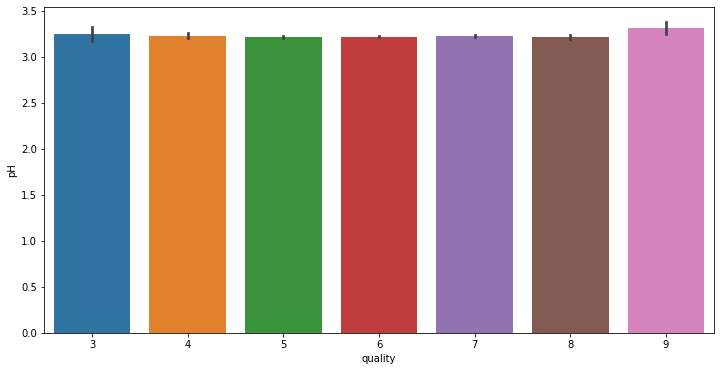

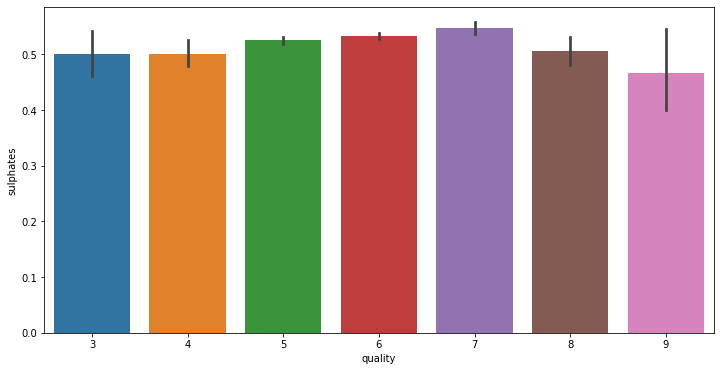

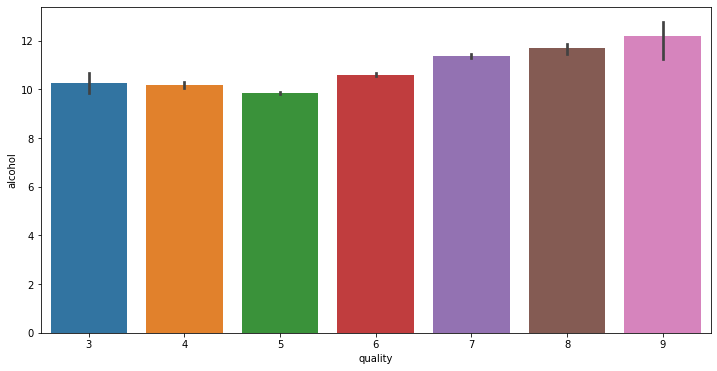

In [12]:
#train에서 각 변수와 quality 변수 사이 분포를 확인합니다
for i in range(11):
  fig =plt.figure(figsize=(12,6))
  sns.barplot(x='quality',y=train.columns[i+2],data=train)
  #barplot : data average cal show / 검은 선은 95%신뢰구간을 의미한다.
  #option : x,y=컬럼 참조,data=데이터 프레임

#데이터 전처리

In [13]:
#type에는 white와 red 두 종류가 있음
#각각 0,1로 변환시킨다.
from sklearn.preprocessing import LabelEncoder
#sklearn.preprocessing: Preprocessing and Normalization시행하는 module
  #LabelEncodoer : 문자를 0으로 시작하여 (class-1)까지 정수형 숫자로 바꿔주는 기능
enc=LabelEncoder()
enc.fit(train['type'])
#fit : fit label encoder
train['type']=enc.transform(train['type'])
# transform : fit label encoder and return encoded label(input : target value / return : encoded label)
test['type']=enc.transform(test['type'])

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [14]:
#불필요한 변수 제거
train_x=train.drop(['index','quality'],axis=1)
#drop : dataframe에서 열을 삭제하는 메서드 (default: True 원본 변경 됨)
  #axis : 0 =index, 1=columns, label인수를 사용할 경우 지정할 축
train_y=train['quality']
test_x=test.drop('index',axis=1)

train_x.shape,train_y.shape,test_x.shape

((5497, 12), (5497,), (1000, 12))

#모델링 진행

In [19]:
from sklearn.ensemble import RandomForestClassifier
# ensemble : 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법 
#/ 앙상블 모델 중 하나로_둘 다 모델을 구성하는 기본요소로 결정트리를 이용한다_분류와 회귀 문제의 다양힌 데이타셋에서 효과적 
  # RandomForestClassifier : 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향을 이 방식을 통해 회피할 수 있음

#모델 선언
model=RandomForestClassifier()
  # RandomForest의 하이퍼 파라미터 default 상태
model

RandomForestClassifier()

In [20]:
#모델 학습
model.fit(train_x,train_y)
  #입력데이터, 라벨값,batch_size :몇개의 샘플로 가중치를 갱신 할 것인지를 지정 , epochs=학습 반복 횟수를 의미

RandomForestClassifier()

In [21]:
#학습된 모델로 test 데이터 예측
y_pred=model.predict(test_x)

#제출 파일 생성

In [22]:
submission=pd.read_csv('/content/gdrive/MyDrive/STUDY/Dacon22/와인품질분류/data/sample_submission.csv')
submission['quality']=y_pred

In [23]:
submission

,index,quality
0,0,6
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6
